Kang Lin, 03676489, Exercise 2

### Task 1

__Fourier Slice Theorem.__ _Let $\mathcal{F}$ denote the Fourier transformation operator and let $f: \mathbb{R}^n \to \mathbb{R}$ be a Fourier transformable function. Furthermore, $\mathcal{P}$ denotes the operator which takes a function and projects it onto a $m$-dimensional plane where $m<n$. Lastly, let $\mathcal{S}_\mathcal{P}$ denote the slicing operator, which redefines the domain of a function to be a plane containing the origin and is parallel to the plane defined by $\mathcal{P}$. Then the following statement holds true,_

$$\mathcal{F}\circ\mathcal{P}\circ f = \mathcal{S}_\mathcal{P}\circ \mathcal{F}\circ f.$$

_Proof._ Without loss of generality, we can define $\mathcal{P}$ such that it projects $f$ onto the plane spanned by the first $m$ axes, i.e.,

$$ \mathcal{P} \circ f  = p_f(x_{1},\dots,x_m) = \int_{-\infty}^\infty \dots \int_{-\infty}^\infty f(x_1, \dots, x_n) \; dx_{m+1} \dots dx_n.$$

The Fourier transformation of $f$ is defined by
$$ \mathcal{F} \circ f = F(k_1, \dots, k_n) = \int_{-\infty}^\infty \dots \int_{-\infty}^\infty f(x_1, \dots, x_n) \;e^{-i2\pi (x_1k_1 +...+ 
x_nk_n)} \; dx_1 \dots dx_n.$$

Then,

$$
\begin{aligned}\mathcal{S}_\mathcal{P} \circ \mathcal{F}\circ f &= \mathcal{S}_\mathcal{P} \circ F(k_1, \dots, k_n)  \\
&= F(k_1,\dots,k_m,0,\dots,0) \\
&= \int_{-\infty}^\infty \dots \int_{-\infty}^\infty f(x_1, \dots, x_n) \; e^{-i2\pi (x_1k_1 +...+x_mk_m)} \; dx_1 \dots dx_n \\
&= \int_{-\infty}^\infty  \dots \int_{-\infty}^\infty f(x_1, \dots, x_n) \; dx_{m+1} \dots dx_n \; e^{-i2\pi (x_1k_1 +...+x_mk_m)} \; dx_1 \dots dx_m\\
&= \int_{-\infty}^\infty  \dots \int_{-\infty}^\infty  p_f(x_{1},\dots,x_m)  \; e^{-i2\pi (x_1k_1 +...+x_mk_m)} \; dx_1 \dots dx_m\\
&= \mathcal{F}\circ\mathcal{P}\circ f.   \qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad \Box
\end{aligned}
$$


Due to the Fourier slice theroem, we know that it doesn't matter if we first project the function onto a plane and then perform Fourier transformation of the projection or if we first Fourier transform the function and then take a central slice of the transformation parallel to the projection plane, as both yield the same solution.

In MRI, this theorem is useful because it allows us to safely reconstruct a 3D image through interpolation. This is because in MRI we aquire the Fourier coefficients of the x-y-plane projected 3D-image. In order to obtain the entire 3D-image, the Fourier slice theorem tells us that the so far aquired coefficients are actually also those from the 3D image itself, and it is okay to simply rotate our coordinate system a bit, aquire the Fourier coefficients of the new projection and continue doing this for 360°. Then we can interploate the 3D Fourier coeffiencts and perform inverse Fourier transformation, which will yield the 3D image.  


### Task 2

From left to right: “Standard sequential Cartesian
filling of k-space with left-to-right frequency-encoding”, “Centric ordering of k-space acquisition”, “Outward radial ordering of k-space” 

In [11]:
using Images
using FFTW
using Wavelets
using PyPlot

In [12]:
N = 256;
phantom = shepp_logan(N,highContrast=true);
F = fftshift(fft(phantom));;


# figure(figsize=(7,5))
# subplot(1,2,1);
# imshow(phantom,cmap="gray")
# axis("off")
# title("Original")

# subplot(1,2,2);
# imshow(log10.(F_abs),cmap="gray") # Using log-scale in order to see the near zero values
# #colorbar(label =  "log-scale")
# axis("off")
# title("FFT (log-scale)")
# show()

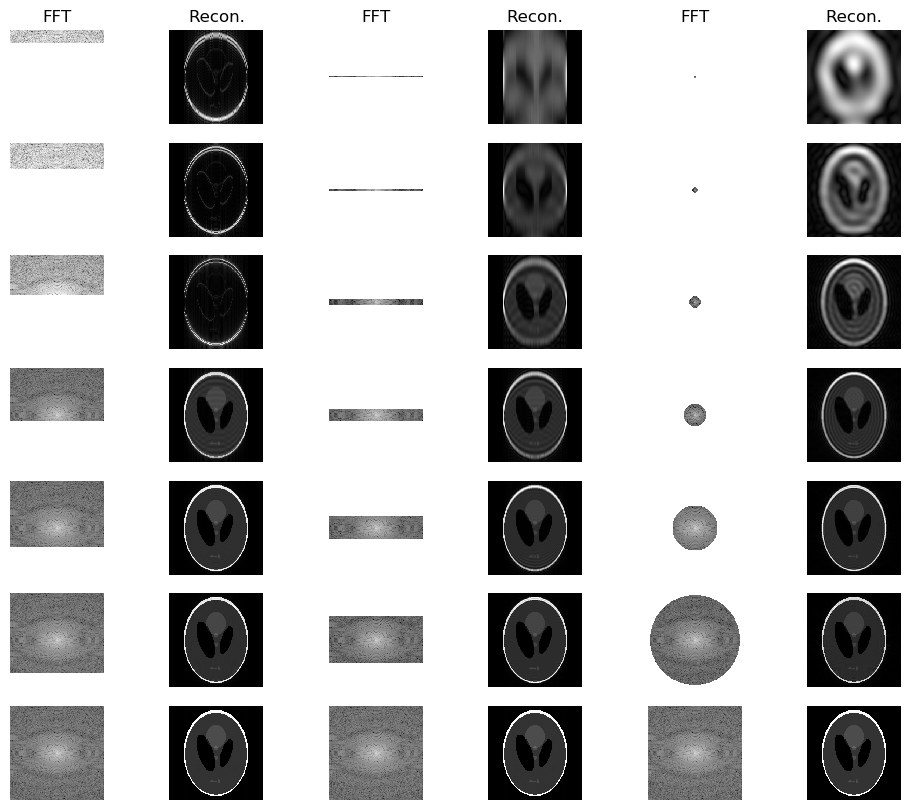

In [14]:
figure(figsize=(12,10))
rows = 7
# Standard sequential Cartesian filling of k-space with left-to-right frequency-encoding
m = rows
i = 1
while i <= m
    im = copy(F)
    im[trunc(Int32, (i*N/m)):end,:] .= 0
    subplot(rows,6,(i-1)*6+1);
    imshow(log10.(abs.(im)),cmap="gray")
    axis("off")
    a = sum(im != 0)
    if i == 1
    title("FFT");
    end

    subplot(rows,6,(i-1)*6+2)
    im_rec = ifft(im)
    imshow(abs.(im_rec), cmap="gray")
    if i == 1
    title("Recon.");
    end
    axis("off")
    show()
    i = i+1
end

# Centric ordering of k-space acquisition
m = 2^rows
i = 2
j = 1
while i <= m
    im = copy(F)
    im[1:trunc(Int32, (N/2 - i*N/(2*m))), :] .= 0
    im[trunc(Int32, (N/2 + i*N/(2*m))):end, :] .= 0
    subplot(rows,6,(j-1)*6+3)
    imshow(log10.(abs.(im)),cmap="gray")
    axis("off")
    a = sum(im != 0)
    if j == 1
    title("FFT");
    end

    subplot(rows,6,(j-1)*6+4)
    im_rec = ifft(im)
    imshow(abs.(im_rec), cmap="gray")
    if j == 1
    title("Recon.");
    end
    axis("off")
    show()
    i = 2*i
    j = j + 1
end

# Outward radial ordering of k-space
x = range(-1, 1, length = N)
y = x'
m = 2^rows
i = 2
j = 1
while i <= m
    im = sqrt.(x.^2 .+ y.^2).< i*0.015; # Select all Fourier Coeffiencents within a certain radius
    im = im.*F;

    subplot(rows,6,(j-1)*6+5)
    imshow(log10.(abs.(im)),cmap="gray");
    axis("off");
    a = sum(im != 0);
    if j == 1
    title("FFT");
    end

    subplot(rows,6,(j-1)*6+6)
    im_rec = ifft(im);
    imshow(abs.(im_rec), cmap="gray");
    if j == 1
    title("Recon.");
    end
    axis("off");
    show();
    i = 2*i
    j = j+1
end

### Task 3 
Consider the system $\mathbf{y} = \mathbf{x} + \mathbf{n}$, where $\mathbf{x} \in \mathbb{C}^N$ is the unknown the signal, $\mathbf{n} \in \mathbb{C}^N$ is i.i.d. zero-mean Gaussian noise, and $\mathbf{y}$ is the received signal. The task is to recover $\mathbf{x}$ from observing $\mathbf{y}$. 

Assuming we use an analyzing matrix $\Omega \in \mathbb{C}^{L\times N}$, we may try to recover $\mathbf{x}$ by solving the following regularization problem

$$ \hat{\mathbf{x}} = \text{argmin}_\mathbf{x}\:||\mathbf{y} - \mathbf{x}||_2^2 + \lambda||\Omega \mathbf{x}||_1 \quad (1)$$ 

with some parameter $\lambda \in \mathbb{R}^+$. The form (1) may also be equivalently interpreted as MAP-estimation of $\mathbf{x}$ and is also called an analysis model.

If we assume that the signal $\mathbf{x}$ is constructed by a dictionary matrix $D \in \mathbb{C}^{N\times L}$ in the form $\mathbf{x} = D\mathbf{\gamma}, \:\mathbf{\gamma}\in \mathbb{C}^L$, then, we may reconstruct the signal by solving 

$$ \hat{\mathbf{\gamma}} = \text{argmin}_\mathbf{\gamma}\:||\mathbf{y} - D\mathbf{\gamma}||_2^2 + \lambda||\mathbf{\gamma}||_1 \quad (2) $$

and applying $\hat{\mathbf{x}} = D\hat{\mathbf{\gamma}}$. The estimation model (2) is called a synthesis model.

As (1) and (2) are essentially Lagrangian functions, we may equivalently reformulate both equations as 

$$ \hat{\mathbf{x}} = \text{argmin}_\mathbf{x}\: ||\Omega \mathbf{x}||_1, \quad  \text{subject to} \;||\mathbf{y} - \mathbf{x}||_2 \leq a \quad(3)$$

$$ \hat{\mathbf{\gamma}} = \text{argmin}_\mathbf{\gamma}\: ||\mathbf{\gamma}||_1, \quad  \text{subject to} \;||y - D \mathbf{\gamma}||_2 \leq a \quad(4)$$

where $a \in \mathbb{R}^+$. The usage of the $\ell_1$-norm is to obtain a sparse soltution with respect to $\Omega \hat{\mathbf{x}}$ or $\hat{\mathbf{\gamma}}$.

Using a sparsifying norm, such as the $\ell_1$-norm, the main difference between those two models is that the sparse analysis model seeks a solution $\hat{\mathbf{x}}$ which is orthorgonal to as many rows in $\Omega$ as possible, while the sparse synthesis model seeks a solution $\mathbf{\gamma}$ which tries to utilize as few as possible columns in $D$ to represent $\hat{\mathbf{x}}$. Furthermore, in the case that $L>N$ and using the $\ell_1$-norm, the geometric interpretations between the two models is highly different. While both models yield polytopes in their ambient spaces, the sparse analysis model polytope consists of an exponential number of vertices with a linear amount of neighbours for each vertex. This means that the probability of any two vertices to be neighbours approaches $0$ as $N \to \infty$. In comparison, the sparse synthesis model has a lot fewer vertices and the probability of any two
(non-antipodal) vertices to be neighbours approaches $1$ as $N \to \infty$.

The so-called principal signals are closely related to the vertices of the corresponding polytope and locating those principal signals when solving (3) and (4) is the objective. Under a few assumptions on the dictionary matrix $D$, this task might be easy for the sparse sythesis model. However, using a traversal algorithm in the case of the sparse analysis model, it may become very time consuming having to check each vertex and is therefore harder to analyze .

### Task 4 

The cartesian Fourier transformation corresponds to the discrete Fourier transformation, which computes the Fourier coeffiencents at equidistant frequencies arranged in a cartesian fashion. The cartesian Fourier transformation can be easily inverted by using the adjoint transformation, i.e., taking the conjugate transpose of the Fourier matrix and applying it. 

The non-cartesian Fourier transformation computes the the Fourier transformation of a signal at frequencies which are more or less arbitrarily chosen, for example we may move along a sprial in the k-space which is a popular choice in MRI. Here, the adjoint operation generally does not correspond to the inverse operation.

For a 2D signal, an implementation in Julia using the `NFFT` package is giving by the following:

First we import the NFFT package
```julia
using NFFT
```

In [4]:
using NFFT
using Distributions # needed for creating the frequency set

Next, we take the Shepp Logan phantom and choose a set of frequency pairs `x` at which we'd like to perform nfft. Here the frequency set is randomly sampled.

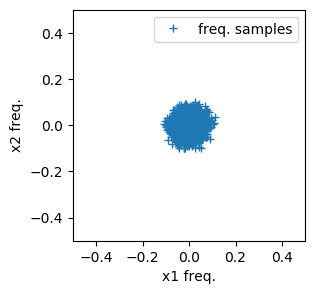

In [5]:
N = 256
phantom = shepp_logan(N,highContrast=true);
# Randomly sample frequencies at which nfft shall be performed, here normal distributed frequecies with zero mean
lb = -0.5    # The truncation lower bound
ub = 0.5    # The truncation upper bound
mu = 0   # The mean of the truncated Normal
sigma = 0.03 # The standard deviation of the truncated Normal
d = Truncated(Normal(mu, sigma), lb, ub)  #Construct the distribution type
x1 = rand(d, 5000)'
x2 = rand(d, 5000)'
x = vcat(x1,x2);
# x = rand(2,5000).-0.5   # Alternatively use this random sampling
figure(figsize = (3,3))
plot(x[1,:],x[2,:],"+",label = "freq. samples");
xlim([-0.5,0.5]);
ylim([-0.5,0.5]);
xlabel("x1 freq.");
ylabel("x2 freq.");
legend();

Using the following code, we perform nfft using the frequencies `x` and afterwards perform the adjoint operation, where we will see that as mentioned before the adjoint nfft does not correspond to the inverse transform

```julia
# Perform nfft of shepp logan phantom and the adjoint operation
p = NFFTPlan(x, (N,N)) # Create plan
g = nfft(p, complex(phantom)) # Nfft of the phantom
ff = nfft_adjoint(p, g) # Adjoint nfft using the coefficients g
```

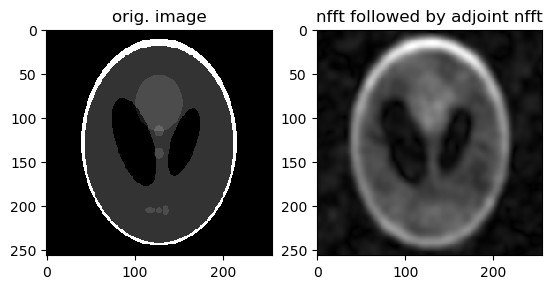

In [6]:
# Perform nfft of shepp logan phantom and the adjoint operation
p = NFFTPlan(x, (N,N)) # Create plan
g = nfft(p, complex(phantom)) # Nfft of the phantom
ff = nfft_adjoint(p, g) # Adjoint nfft using the coefficients g
subplot(1,2,1)
imshow(phantom, cmap = "gray")
title("orig. image")
subplot(1,2,2)
imshow(abs.(ff), cmap = "gray"); # display image after adjoint nfft
title("nfft followed by adjoint nfft");

In the following we'd like to go the other direction. That is, like in MRI we pretend to have aquired some k-space data and want to reconstruct the image using these data.

In [7]:
N = 256;   # Must be even number
phantom = shepp_logan(N,highContrast=true); # Shepp Logan Phantom
F = fftshift(fft(phantom)); # Compute zero-frequency centred fft of phantom

In [8]:
# Compute zero-centred frequencies of the dft format
fr = zeros(Int(N/2))
for i = 1:Int(N/2)
    fr[i] = i-1
end
freqs = vcat(fr,-N/2,-fr[end:-1:2])/N;
freqs = circshift(freqs, N/2);

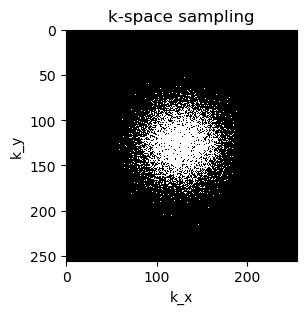

In [9]:
# Simulate k-space sampling
# Here we sample in Gaussian distributed fashion
lb = 1    # The truncation lower bound
ub = N    # The truncation upper bound
mu = trunc(Int32, N/2)    # The mean of the truncated Normal
sigma = 20 # The standard deviation of the truncated Normal
d = Truncated(Normal(mu, sigma), lb, ub)  #Construct the distribution type

samp = 10000 # Number of samples
ind = trunc.(Int64, rand(d, samp,2)); # Indices of samples (possibly duplicated coordinates here)

A = zeros(N,N)
for i = 1: samp
    A[ind[i,1],ind[i,2]] = 1
end
A = A.==1 # Turn into logical matrix
#A = circshift(A, trunc(Int32, N/2))
#A = circshift(A', trunc(Int32, N/2))

ind = findall(x->x==true, A); # Find indices of entries in A where the entry is not 0, now indices are unique

fHat = F[A] # Extract coefficients of the phantom dft at the non-zero postions in A, these will be the simulated k-space coefficients

# Extract the frequencies to the corresponding coefficients
x1 = zeros(size(ind)[1])
x2 = zeros(size(ind)[1])
for i = 1 : size(ind)[1]
    x1[i] = freqs[ind[i][1]]
    x2[i] = freqs[ind[i][2]]
end
x = hcat(x1,x2)';

figure(figsize=(3,3))
imshow(A, cmap = "gray")
xlabel("k_x")
ylabel("k_y")
title("k-space sampling");

Using the k-space data, i.e, the frequency coefffients `fHat` and their corresponding frequencies `x`, we reconstruct the image using the adjoint nfft

```julia
p = NFFTPlan(x, (N,N))        # Create plan
f = nfft_adjoint(p, fHat)     # Perform adjoint nfft aka reconstruct image 
                              # using the sampled fourier coefficents and frequencies

# for some reason the image has a cyclic shift, so I have to correct it
f = circshift(f, N/2)
f = circshift(f', N/2)'
```

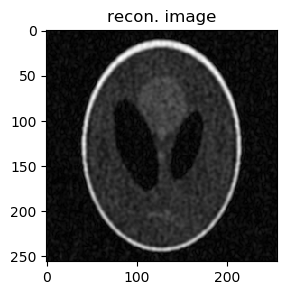

In [10]:
p = NFFTPlan(x, (N,N))        # Create plan
f = nfft_adjoint(p, fHat)     # Perform adjoint nfft aka reconstruct image using the sampled fourier coefficents and frequencies

# for some reason the image has a cyclic shift, so I have to correct it
f = circshift(f, N/2)
f = circshift(f', N/2)'

figure(figsize=(3,3))
imshow(abs.(f), cmap = "gray")
title("recon. image");


### Task 5
Spin echo imaging utilizes two radiofrequency  pulses, an excitation pulse that is normally 90°, and a 180° refocusing pulse. The spin echo technique is suitable when the objective is to achieve good image quality, with nice contrasts and robustness towards artefacts caused by magnetic field distortions. However, the signal acquisition time usually takes very long, especially for T2 weighted images. 

Gradient echo imaging uses an excitation pulse with a flip angle less than 90° in conjunction with a gradient reversal. As the flip angle is less than 90°, only a proportion of the z-magnetization is transferred into the x-y-plane which yields faster recovery of the z-magnetization and therefore shorter repetition times. Due to this, gradient echo imaging is suited for fast imaging, however, at the cost of lower SNR. Furthermore, gradient echo imaging is less robust towards artifacts as the absence of the 180° refocusing pulse leads to greater influence of magnetic susceptibility effects, different appearances of the chemical shift artefact and flow blood.
